In [248]:
# Install the required libraries
!pip install prophet

In [249]:
# Import the required libraries and dependencies
import pandas as pd
import chardet
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
import seaborn as sns


In [250]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")
wood_prices = pd.read_csv("wood_prices_dataset.csv")


In [251]:
##Homeownership Rate 

In [252]:
display(home_ownership_rate.head())



,DATE,HOWNRATEACS039061
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [253]:
home_ownership_rate = home_ownership_rate.rename(columns={"DATE":"Date", "HOWNRATEACS039061":"Homeownership Rate"})
home_ownership_rate.head()

,Date,Homeownership Rate
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [254]:
x_axis = np.arange(len(home_ownership_rate))
tick_locations = [value for value in x_axis]

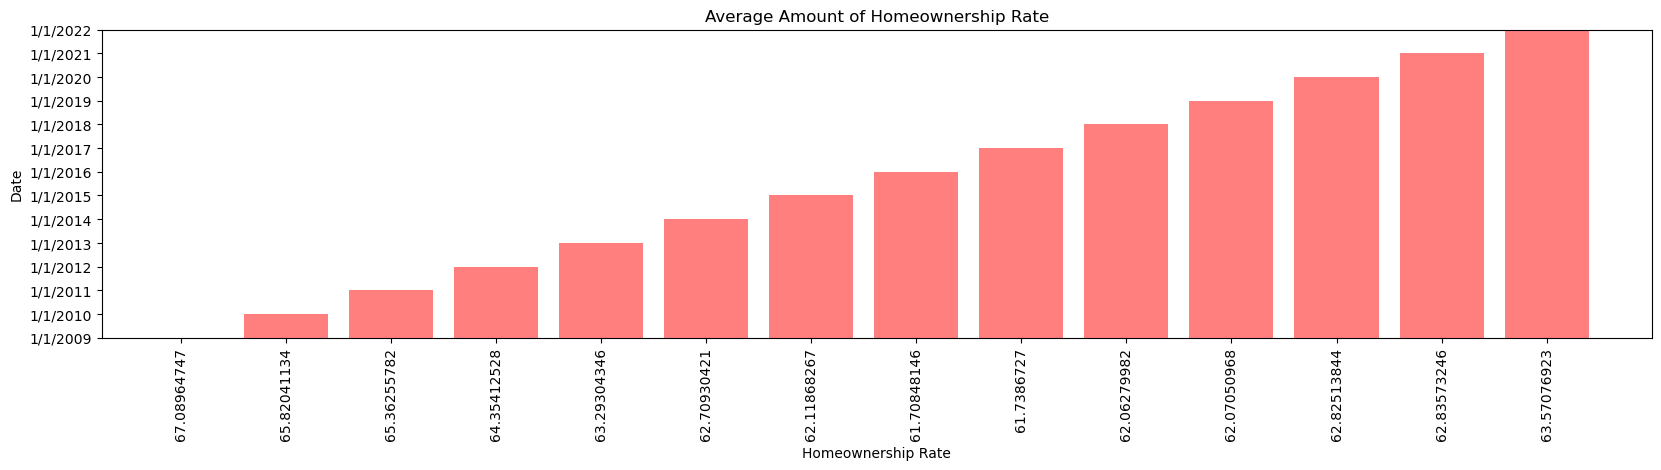

<Figure size 640x480 with 0 Axes>

In [255]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, home_ownership_rate["Date"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, home_ownership_rate["Homeownership Rate"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(home_ownership_rate["Date"]))

# Set a Title and labels
plt.title("Average Amount of Homeownership Rate")
plt.xlabel("Homeownership Rate")
plt.ylabel("Date")
plt.show()

# Save our graph and show the grap
plt.tight_layout()
plt.show()

In [256]:
## Wood Prices

In [257]:
display(wood_prices)

,Wood Type,Country,Price (USD),Supply Source,Quality Rating,Popularity,Demand Level,Availability
0,Maple,China,166.59,Imported,Medium,3,Medium,Moderate
1,Rosewood,South Africa,144.71,Local,Low,6,Medium,Moderate
2,Rosewood,South Africa,216.92,Local,Medium,2,Medium,Abundant
3,Oak,Russia,130.13,Imported,Medium,5,Low,Abundant
4,Bamboo,Australia,114.66,Local,Medium,8,Low,Abundant
...,...,...,...,...,...,...,...,...
995,Rosewood,Indonesia,151.81,Local,Medium,2,Medium,Limited
996,Pine,Germany,230.97,Imported,Low,4,Low,Abundant
997,Maple,Indonesia,200.87,Local,Low,4,High,Limited
998,Maple,South Africa,227.75,Imported,Low,8,High,Moderate


In [258]:
wood_prices.count()

Wood Type         1000
Country           1000
Price (USD)       1000
Supply Source     1000
Quality Rating    1000
Popularity        1000
Demand Level      1000
Availability      1000
dtype: int64

In [259]:
wood_prices.columns

Index(['Wood Type', 'Country', 'Price (USD)', 'Supply Source',
       'Quality Rating', 'Popularity', 'Demand Level', 'Availability'],
      dtype='object')

In [260]:
x_axis = np.arange(len(wood_prices))
tick_locations = [value for value in x_axis]

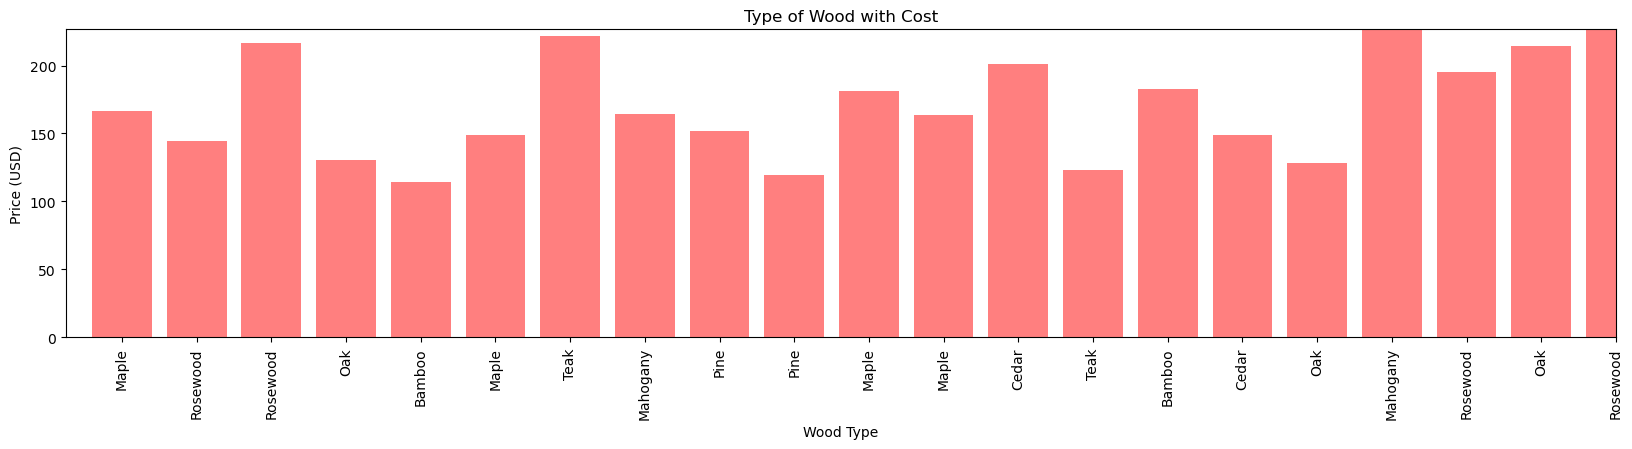

<Figure size 640x480 with 0 Axes>

In [261]:
#try countriess bc it has lower numbers , plot means of price based on countires /avalibliility/ quality  , price range diff from local and inported wood 
# Set x and y limits


plt.figure(figsize=(20,4))
plt.bar(x_axis, wood_prices["Price (USD)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, wood_prices["Wood Type"], rotation="vertical")

# Set x and y limits
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(wood_prices["Price (USD)"]))
# Set x and y limits
plt.xlim(-0.75, len(x_axis[:20]))
plt.ylim(0, max(wood_prices["Price (USD)"][:20]))
# Set a Title and labels
plt.title("Type of Wood with Cost")
plt.xlabel("Wood Type")
plt.ylabel("Price (USD)")
plt.show()

# Save our graph and show the grap
plt.tight_layout()
plt.show()

(0.0, 226.61)

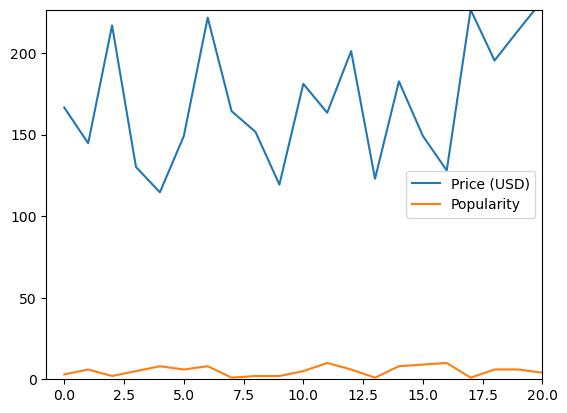

In [262]:
wood_prices.plot()
plt.xlim(-0.75, len(x_axis[:20]))
plt.ylim(0, max(wood_prices["Price (USD)"][:20]))

In [263]:
## Merging sales and new construction sales to compaire 

In [264]:
merged_sales_newcon = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")
merged_sales_newcon.head()

,RegionID_x,SizeRank_x,RegionName,RegionType_x,StateName_x,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,1/31/2023_y,2/28/2023_y,3/31/2023_y,4/30/2023_y,5/31/2023_y,6/30/2023_y,7/31/2023_y,8/31/2023_y,9/30/2023_y,10/31/2023_y
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


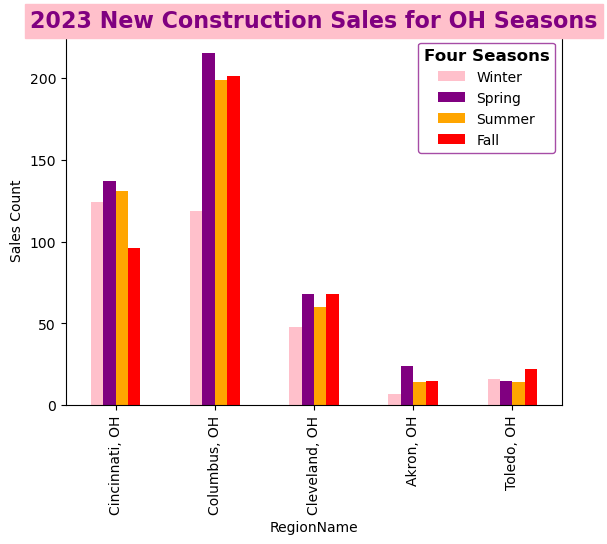

In [265]:
##MERGING METRO SALES AND NEW CONSTRUCTION!!!!!!!!!!!!!!!!!! <3 <3 <3 
#this is just new construction sales that i showcased because i just pulled "_y" data and that is just the new construction data not the metro sales 

## Makeing a bar chart to show 2023 all four season sales for new construction sales 

# Read datasets
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['1/31/2023_y','4/30/2023_y', '8/31/2023_y','10/31/2023_y'], color=['pink','purple', 'orange','red'])
legend = plt.legend(['Winter', 'Spring', 'Summer', 'Fall'], loc='upper right', title='Four Seasons', fancybox=True, framealpha=0.7, edgecolor='purple')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('2023 New Construction Sales for OH Seasons', fontsize=16, color='purple', fontweight='bold', backgroundcolor='pink')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [266]:
#New Construction Winter Sales 

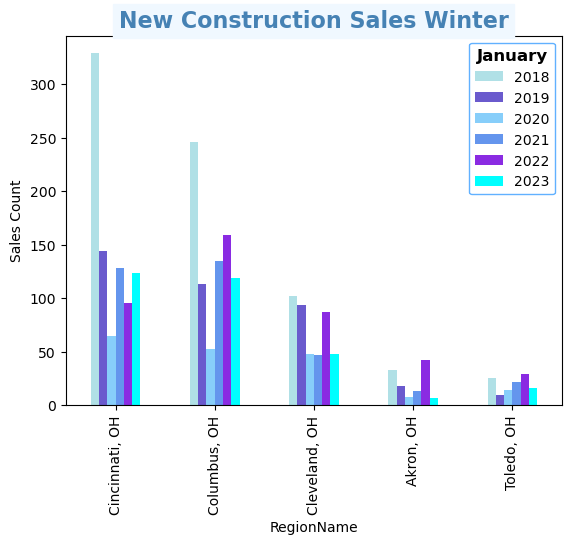

In [267]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['1/31/2018_y','1/31/2019_y', '1/31/2020_y','1/31/2021_y', '1/31/2022_y', '1/31/2023_y'], color=['powderblue','slateblue', 'lightskyblue','cornflowerblue', 'blueviolet', 'cyan' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='January', fancybox=True, framealpha=0.7, edgecolor='dodgerblue')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Winter', fontsize=16, color='steelblue', fontweight='bold', backgroundcolor='aliceblue')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [268]:
## New Construction Spring Sales 

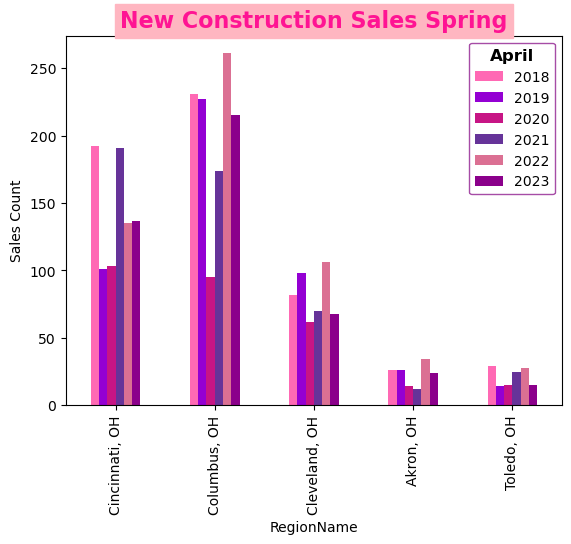

In [269]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['4/30/2018_y','4/30/2019_y', '4/30/2020_y','4/30/2021_y', '4/30/2022_y', '4/30/2023_y'], color=['hotpink','darkviolet', 'mediumvioletred','rebeccapurple', 'palevioletred', 'darkmagenta' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='April', fancybox=True, framealpha=0.7, edgecolor='purple')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Spring', fontsize=16, color='deeppink', fontweight='bold', backgroundcolor='lightpink')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [270]:
## New Construction Sales Summer 

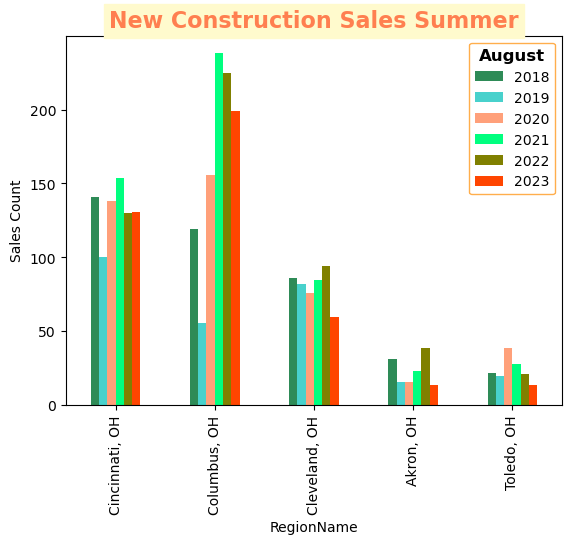

In [271]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['8/31/2018_y','8/31/2019_y', '8/31/2020_y','8/31/2021_y', '8/31/2022_y', '8/31/2023_y'], color=['seagreen','mediumturquoise', 'lightsalmon','springgreen', 'olive', 'orangered' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='August', fancybox=True, framealpha=0.7, edgecolor='darkorange')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Summer', fontsize=16, color='coral', fontweight='bold', backgroundcolor='lemonchiffon')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [272]:
## New Construction Fall Sales

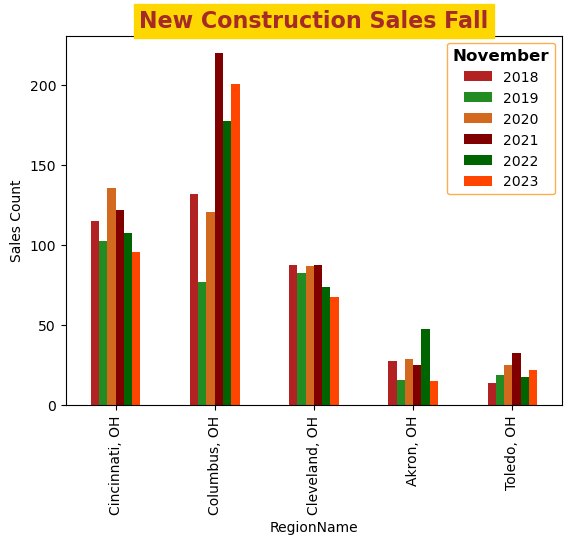

In [273]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['10/31/2018_y','10/31/2019_y', '10/31/2020_y','10/31/2021_y', '10/31/2022_y', '10/31/2023_y'], color=['firebrick','forestgreen', 'chocolate','maroon', 'darkgreen', 'orangered' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='November', fancybox=True, framealpha=0.7, edgecolor='darkorange')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Fall', fontsize=16, color='brown', fontweight='bold', backgroundcolor='gold')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [274]:


# # Assuming you have a DataFrame named merged_sales_newcon
# # Replace this with your actual data
# data = {
#     'X': np.random.rand(1000) * 10,
#     'Sine': np.sin(np.linspace(0, 10, 1000)),
#     'Cosine': np.cos(np.linspace(0, 10, 1000)),
#     'StateName_x': np.random.choice(['OH', 'NY'], size=1000),
#     'RegionName_x': np.random.choice(['', ''], size=1000)

# }

# merged_sales_newcon = pd.DataFrame(data)

# # Filter the DataFrame for rows where 'StateName_x' is 'OH'
# merged_sales_newcon = merged_sales_newcon.loc[merged_sales_newcon['StateName_x'] == 'OH']

# # Display the filtered DataFrame
# display(merged_sales_newcon)

# # Create a scatter plot with color-mapped points
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     x=merged_sales_newcon['X'],
#     y=merged_sales_newcon['Sine'],
#     c=merged_sales_newcon['Cosine'],
#     cmap='viridis',  # Choose a colormap
#     marker='o',
#     alpha=0.7  # Adjust transparency for better visibility
# )

# # Set x-axis label
# plt.xlabel('X-axis')

# # Set y-axis label
# plt.ylabel('Sine')

# # Add colorbar for the Cosine values
# cbar = plt.colorbar(scatter)
# cbar.set_label('Cosine', rotation=270, labelpad=15)

# # Add a legend
# plt.legend(['Sine'], loc='upper right')

# # Add title
# plt.title('Scatter Plot with Color-Mapped Cosine Values (Filtered for OH)')

# # Show the plot
# plt.show()


In [275]:
# merged_sales_newcon = merged_sales_newcon.loc[merged_sales_newcon['StateName_x'] == 'OH']
# display(merged_sales_newcon)


In [276]:
# # Sample DataFrame creation (replace this with your actual data)
# data = {
#     'Date': pd.to_datetime(['1/31/18', '1/31/19', '1/31/20', '1/31/21', '1/31/22', '1/31/23']*3),
#     'RegenName': np.repeat(['OH', 'B', 'C'], 6),
#     'Value': np.random.randn(18)
# }
# merged_sales_newcon = pd.DataFrame(data)

# # Set the order of the x-axis (replace this with your actual dates)
# order = pd.to_datetime(['1/31/18', '1/31/19', '1/31/20', '1/31/21', '1/31/22', '1/31/23'])

# # Create a violin plot using seaborn
# plt.figure(figsize=(12, 6))
# sns.violinplot(x='Date', y='Value', hue='RegenName', data=merged_sales_newcon, order=order, inner='quartile')

# # Set x-axis labels
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Date')

# # Set y-axis label
# plt.ylabel('Value')

# # Set the title
# plt.title('Line Violin Plot')

# # Show the plot
# plt.show()

In [277]:
# # Generate data
# np.random.seed(42)
# data = {
#     'Category': np.random.choice(['A', 'B', 'C'], size=100),
#     'Value': np.random.normal(loc=0, scale=1, size=100)
# }
# merged_sales_newcon = pd.DataFrame(data)

# # Compute quartiles, median, and interquartile range (IQR) for each category
# summary_stats = merged_sales_newcon.groupby('Category')['Value'].describe()

# # Define figure and axis
# fig, ax = plt.subplots()

# # Plot violins for each category
# for category, values in merged_sales_newcon.groupby('Category')['Value']:
#     density = np.histogram(values, bins=10, density=True)[0]
#     ax.fill_betweenx(y=density, x1=category, alpha=0.5)

# # Plot quartiles, median, and IQR as lines
# for category, stats in summary_stats.iterrows():
#     ax.plot([category, category], [stats['25%'], stats['75%']], color='black', linestyle='-', linewidth=2)
#     ax.plot([category - 0.1, category + 0.1], [stats['50%'], stats['50%']], color='black', linestyle='-', linewidth=2)

# # Set labels and title
# ax.set_xticks(df['Category'].unique())
# ax.set_xticklabels(df['Category'].unique())
# ax.set_xlabel('Category')
# ax.set_ylabel('Value')
# ax.set_title('Violin Plot')

# plt.show()


In [278]:
# # Assuming you have a DataFrame named merged_sales_newcon with columns 'X', 'Sine', and 'Cosine'
# # Replace this with your actual data
# data = {
#     'X': np.random.rand(1000) * 10,
#     'Sine': np.sin(np.linspace(0, 10, 1000)),
#     'Cosine': np.cos(np.linspace(0, 10, 1000))
# }

# merged_sales_newcon = pd.DataFrame(data)
# # Filter the DataFrame for X values between 4 and 6
# filtered_data = merged_sales_newcon[(merged_sales_newcon['X'] >= 4) & (merged_sales_newcon['X'] <= 6)]
# # Create a scatter plot with color-mapped points
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     x=merged_sales_newcon['X'],
#     y=merged_sales_newcon['Sine'],
#     c=merged_sales_newcon['Cosine'],
#     cmap='viridis',  # Choose a colormap
#     marker='o',
#     alpha=0.7  # Adjust transparency for better visibility
# )

# # Set x-axis label
# plt.xlabel('X-axis')

# # Set y-axis label
# plt.ylabel('Sine')
# # Add colorbar for the Cosine values
# cbar = plt.colorbar(scatter)
# cbar.set_label('Cosine', rotation=270, labelpad=15)

# # Add a legend
# plt.legend(['Sine'], loc='upper right')

# # Add title
# plt.title('Scatter Plot with Color-Mapped Cosine Values')

# # Show the plot
# plt.show()

In [279]:
# merged_sales_newcon.plot()
# # x_axis = np.arange(0, 10, 0.1)
# # sin = np.sin(x_axis)
# # cos = np.cos(x_axis)
# # plt.plot(x_axis, sin, linewidth=0, marker="o", color="blue", label="Sine")
# # plt.plot(x_axis, cos, linewidth=0, marker="^", color="red", label="Cosine")
# # Create a common x-axis
# x_axis = np.arange(0, 10, 0.1)

# # Generate sine and cosine values for the given x-axis
# sin_values = np.sin(x_axis)
# cos_values = np.cos(x_axis)

# # Plot the sine and cosine functions using the common x-axis
# plt.plot(x_axis, sin_values, linewidth=0, marker="o", color="blue", label="Sine")
# plt.plot(x_axis, cos_values, linewidth=0, marker="^", color="red", label="Cosine")

# # Set x-axis label
# plt.xlabel('X-axis')

# # Set y-axis label
# plt.ylabel('Y-axis')

# # Add a legend
# plt.legend()
# plt.show()

In [280]:
##US Census

In [281]:


us_census_transposed = us_census.set_index("Fact").transpose()

display(us_census_transposed)



Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,Value Flags,-,F,D,N,FN,X,S,NaN,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Either no or too few sample observations were ...,Fewer than 25 firms,Suppressed to avoid disclosure of confidential...,Data for this geographic area cannot be displa...,Footnote on this item in place of data,Not applicable,Suppressed; does not meet publication standards,Not available,Value greater than zero but less than half uni...
"Hamilton County, Ohio",NaN,"825,037",NaN,"830,625",NaN,-0.70%,"830,639","802,374",6.10%,22.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Value Note for Hamilton County, Ohio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
us_census_transposed.count()

Fact
Population estimates, July 1, 2023, (V2023)                                             0
Population Estimates, July 1, 2022, (V2022)                                             1
Population estimates base, April 1, 2020, (V2023)                                       0
Population estimates base, April 1, 2020, (V2022)                                       1
Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)    0
                                                                                       ..
FN                                                                                      1
X                                                                                       1
S                                                                                       1
NaN                                                                                     1
Z                                                                                       1
Lengt

In [283]:
#us_census_transposed.isnull().mean() * 100

In [284]:
us_census_transposed=us_census_transposed.dropna()

In [285]:
us_census_transposed.isnull().sum()

Fact
Population estimates, July 1, 2023, (V2023)                                             0.0
Population Estimates, July 1, 2022, (V2022)                                             0.0
Population estimates base, April 1, 2020, (V2023)                                       0.0
Population estimates base, April 1, 2020, (V2022)                                       0.0
Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)    0.0
                                                                                       ... 
FN                                                                                      0.0
X                                                                                       0.0
S                                                                                       0.0
NaN                                                                                     0.0
Z                                                                          

In [286]:
display(us_census_transposed)

Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,Value Flags,-,F,D,N,FN,X,S,NaN,Z


In [287]:
##Home Values Forecast with Zillow 

In [288]:
display(home_value_forecast)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,12/31/2023,2/29/2024,11/30/2024
0,102001,0,United States,country,NaN,11/30/2023,0.1,0.0,0.0
1,394913,1,"New York, NY",msa,NY,11/30/2023,0.1,-0.5,-2.9
2,753899,2,"Los Angeles, CA",msa,CA,11/30/2023,0.3,-1.0,-2.2
3,394463,3,"Chicago, IL",msa,IL,11/30/2023,0.1,-0.3,-2.2
4,394514,4,"Dallas, TX",msa,TX,11/30/2023,-0.2,-0.8,-0.8
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,11/30/2023,-1.6,-3.9,-9.5
891,394743,936,"Ketchikan, AK",msa,AK,11/30/2023,-0.5,-1.0,-3.8
892,753874,937,"Craig, CO",msa,CO,11/30/2023,0.0,-0.3,1.0
893,395188,938,"Vernon, TX",msa,TX,11/30/2023,-1.3,-2.8,-5.0


In [289]:
##Metro Sales Count 

In [290]:
# display(metro_sales_count)

In [291]:
## New Construction Sales Data

In [292]:
new_construction_sales.shape
display(new_construction_sales)




,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,394548,641,"Durant, OK",msa,OK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,12.0,11.0,6.0,7.0,8.0
316,394567,663,"Ellensburg, WA",msa,WA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,10.0,15.0,13.0,9.0,13.0,17.0,16.0
317,394476,704,"Clewiston, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,12.0,14.0,21.0,10.0,20.0,15.0,12.0,11.0,25.0,14.0
318,394713,768,"Jackson, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,9.0,6.0,6.0


In [293]:
new_construction_sales.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


In [294]:
new_construction_sales.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2018', '2/28/2018', '3/31/2018', '4/30/2018', '5/31/2018',
       '6/30/2018', '7/31/2018', '8/31/2018', '9/30/2018', '10/31/2018',
       '11/30/2018', '12/31/2018', '1/31/2019', '2/28/2019', '3/31/2019',
       '4/30/2019', '5/31/2019', '6/30/2019', '7/31/2019', '8/31/2019',
       '9/30/2019', '10/31/2019', '11/30/2019', '12/31/2019', '1/31/2020',
       '2/29/2020', '3/31/2020', '4/30/2020', '5/31/2020', '6/30/2020',
       '7/31/2020', '8/31/2020', '9/30/2020', '10/31/2020', '11/30/2020',
       '12/31/2020', '1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021',
       '5/31/2021', '6/30/2021', '7/31/2021', '8/31/2021', '9/30/2021',
       '10/31/2021', '11/30/2021', '12/31/2021', '1/31/2022', '2/28/2022',
       '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022',
       '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/

In [295]:
new_construction_sales.count()

RegionID      320
SizeRank      320
RegionName    320
RegionType    320
StateName     319
             ... 
6/30/2023     287
7/31/2023     292
8/31/2023     297
9/30/2023     301
10/31/2023    318
Length: 75, dtype: int64

In [296]:
new_construction_sales.isnull().mean() * 100

RegionID       0.0000
SizeRank       0.0000
RegionName     0.0000
RegionType     0.0000
StateName      0.3125
               ...   
6/30/2023     10.3125
7/31/2023      8.7500
8/31/2023      7.1875
9/30/2023      5.9375
10/31/2023     0.6250
Length: 75, dtype: float64

In [297]:
new_construction_sales = new_construction_sales.dropna()

In [298]:
new_construction_sales.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
6/30/2023     0
7/31/2023     0
8/31/2023     0
9/30/2023     0
10/31/2023    0
Length: 75, dtype: int64

In [299]:
display(new_construction_sales)
#The number of unique new construction homes that sold during the month. for the dates 

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [300]:
#multiple reg analysis, create list for dates , time series analysis (medium.com), json data format open up list copy and paste dates into it
#range function (ref data frame then select range) python

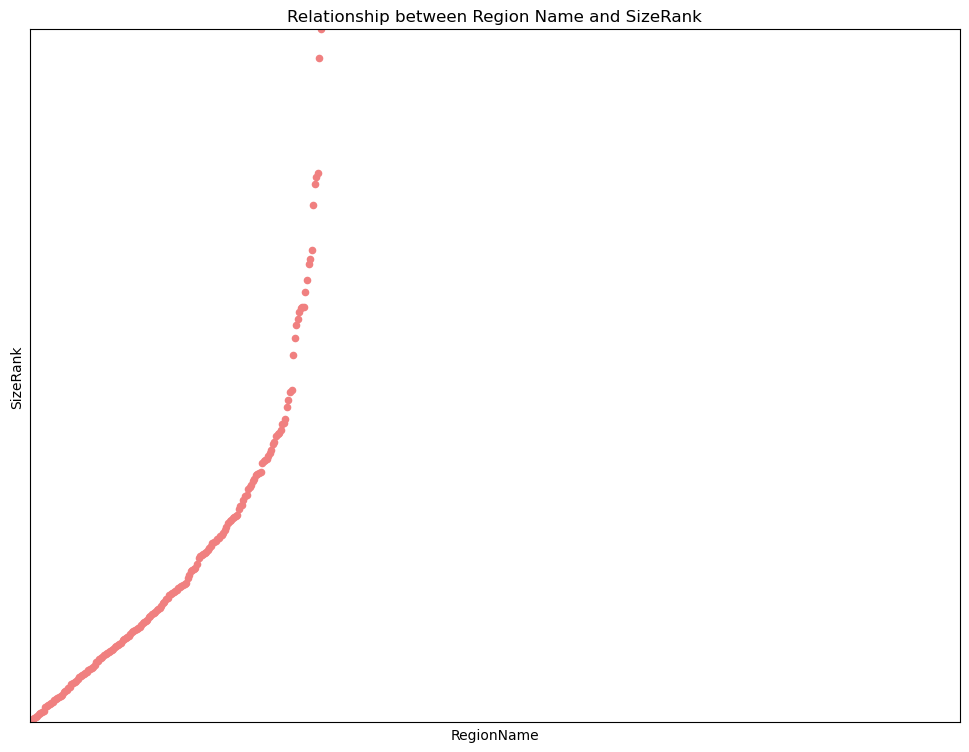

In [301]:
# Scatterplot of RegionName and dates
new_construction_sales_visual = new_construction_sales.plot.scatter(x="RegionName",y="SizeRank",title="Relationship between Region Name and SizeRank", figsize=(12,9),
                                           xlabel="RegionName",ylabel="SizeRank",color="lightcoral",
                                          xlim=(1,601),ylim=(1,601),xticks=(),yticks=())

In [302]:
# display(new_construction_sales)

In [303]:
# new_construction_sales_visual = new_construction_sales.drop(['RegionID','SizeRank','RegionType','StateName'], axis=1)
# display(new_construction_sales_visual)

In [304]:
# #do not use scatter plot (only when two continuous numbers being compaird), use box/violin plot
# #number of new constructions y lable 
# new_construction_sales_visual = new_construction_sales.plot.scatter(x="RegionName",y="1/31/2018",title="Relationship between Region Name and Date", figsize=(14,10),
#                                            xlabel="RegionName",ylabel="Date",color="lightcoral",
#                                           ylim=(1,601),xticks=("New York, NY", "Los Angeles, CA", "Chicago, IL", "Dallas, TX"),yticks=(10, 100, 200, 300, 400, 500, 600, 700, 1000))
# plt.tick_params(axis='x',which='major', labelsize=8)
# plt.tight_layout()
                                        

In [305]:
# display(new_construction_sales)

In [306]:
# new_construction_sales = new_construction_sales[new_construction_sales['StateName'] == 'OH']
# display(new_construction_sales)

In [307]:
# mean_numpy = np.mean(new_construction_sales)
# print(f"The mean new construction sales is {mean_numpy}")

# median_numpy = np.median(new_construction_sales)
# print(f"The median new construction sales is {median_numpy}")

# mode_scipy = st.mode(new_construction_sales,keepdims=False)
# print(f"The mode new construction sales is {mode_scipy}")

In [308]:
# plt.hist(new_construction_sales)
# plt.xlabel('Regions')
# plt.ylabel('Sales')
# plt.show()

In [309]:
# new_construction_sales = new_construction_sales.groupby('location').agg({'column1': 'mean', 'column2': 'mean'}).reset_index()


In [310]:
# #pre covid post  covid, before march 2020 two agg columns use hue paramenter eto giev color to diff locations 
# #bar , location is a category
# new_construction_sales = new_construction_sales.plot.scatter(x="RegionName",y="1/31/2018",title="Sales in January 2023", figsize=(20,10),
#                                            xlabel="RegionName",ylabel="Date",color="lightcoral",
#                                           ylim=(1,601),xticks=("Cincinnati, OH", "Columbus, OH", "Cleveland, OH", "Dayton, OH", "Akron, OH", "Toledo, OH"),yticks=(10, 100, 200, 300, 400, 500, 600, 700, 1000))

In [311]:
# display(new_construction_sales)

In [312]:
# new_construction_sales_visual.plot(kind="bar", figsize=(13,1), axis=3)

# plt.title("New Construction")

# plt.show()
# plt.tight_layout()

In [313]:
# new_construction_sales.head()

In [314]:
# new_construction_sales = new_construction_sales[new_construction_sales['StateName'] == 'OH']
# display(new_construction_sales)

In [315]:
# new_construction_sales[["1/31/2023","1/31/2022", "RegionName"]].plot()

In [316]:
# new_construction_sales[["1/31/2023","1/31/2022", "RegionName"]].corr()

In [317]:
#new_construction_sales = new_construction_sales.loc[(new_construction_sales['StateName']=='OH')]
#new_construction_sales

In [318]:
# #dropped non-numerical columns
# dates = new_construction_sales.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'])
# dates

In [319]:
# dates.columns = pd.to_datetime(dates.columns)
# dates

In [320]:
# dates['Date'] = ''
# dates

In [321]:
# dates_t = dates.set_index('Date').T
# dates_t

In [322]:
# dates_t['Date'] = pd.to_datetime(dates_t.index)
# dates_t.drop(columns='Date')
# dates_t.set_index('Date', inplace=True)

In [323]:
# dates_t.resample('Y').sum()

In [324]:
# dates_t.columns = ['Cincinnati','Columbus','Cleveland','Akron','Toledo']
# dates_t

In [325]:
# dates_t.plot()
# plt.title("New Construction")

In [326]:
##Home Sales with Zillow 

In [327]:
# display(zestimate)